# Understanding Classification Model Performance Metrics

**Group members: Yifeng Lin, Yuan Zheng and Ziyang Guo**

## Introduction:
 The performance of classification models can be facilitated through a combination of calculating certain types of performance evaluation graphics. In this assignment, we will calculate a suite of classification model performance metrics via Python functions. We will also create graphical output via Python code that can be used to evaluate the performance of classification models.  
   
This dataset has approximately 180 labeled binary observations. this classification are either '0' or '1'.

## Data summary:  
1) class: the actual classification for the observation.

2) scored.class: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification
for an observation is a ‘1’) for the observation against a 0.50 threshold)).

3) scored.probability: the classification model’s probability score (i.e., the likelihood that the correct
classification for an observation is a ‘1’) for the observation.

In [1]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/M5_Data.csv')
data.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [2]:
data1 = data[['class','scored.class','scored.probability']]
data1.head(10)

,class,scored.class,scored.probability
0,0,0,0.328452
1,0,0,0.273190
2,1,0,0.109660
3,0,0,0.055998
4,0,0,0.100491
5,0,0,0.055155
6,0,0,0.107115
7,0,0,0.459947
8,0,0,0.117024
9,0,0,0.315363


In [3]:
data1['class']

0      0
1      0
2      1
3      0
4      0
      ..
176    0
177    1
178    1
179    0
180    0
Name: class, Length: 181, dtype: int64

In [4]:
data1.describe()

,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000
mean,0.314917,0.176796,0.303726
std,0.465771,0.382554,0.231235
min,0.000000,0.000000,0.023228
25%,0.000000,0.000000,0.117024
50%,0.000000,0.000000,0.239994
75%,1.000000,0.000000,0.430926
max,1.000000,1.000000,0.946334


## My functions

In [5]:
dc = pd.crosstab(data1['class'], data1['scored.class'])
dc

scored.class,0,1
class,,
0,119,5
1,30,27


TP = 27  
TN = 119  
FN = 30  
FP = 5  
Total true 1 = 57  
Total true 0 = 124

### Accuracy score

In [6]:
# Python function that calculates and returns the Accuracy metric
def accuracy (a,b):
    accuracy = pd.crosstab(a,b)
    TP = accuracy.iloc[(1,1)]
    TN = accuracy.iloc[(0,0)]
    FN = accuracy.iloc[(1,0)]
    FP = accuracy.iloc[(0,1)]
    score = (TP+TN)/(TP+FP+TN+FN)
    return score
accuracy(data1['class'], data1['scored.class'])
    

0.8066298342541437

### Precision

In [7]:
# Python function that calculates and returns the precision metric
def precision(a,b):
    precision = pd.crosstab(a,b)
    TP = precision.iloc[(1,1)]
    TN = precision.iloc[(0,0)]
    FN = precision.iloc[(1,0)]
    FP = precision.iloc[(0,1)]
    score = TP/(TP+FP)
    return score
precision(data1['class'], data1['scored.class'])

0.84375

### Recall

In [8]:
# Python function that calculates and returns the recall metric
def recall(a,b):
    recall = pd.crosstab(a,b)
    TP = recall.iloc[(1,1)]
    TN = recall.iloc[(0,0)]
    FN = recall.iloc[(1,0)]
    FP = recall.iloc[(0,1)]
    score = TP/(TP+FN)
    return score
recall(data1['class'], data1['scored.class'])

0.47368421052631576

### Specificity

In [9]:
# Python function that calculates and returns the specificity metric
def specificity(a,b):
    specificity = pd.crosstab(a,b)
    TP = specificity.iloc[(1,1)]
    TN = specificity.iloc[(0,0)]
    FN = specificity.iloc[(1,0)]
    FP = specificity.iloc[(0,1)]
    score = TN/(TN+FP)
    return score
specificity(data1['class'], data1['scored.class'])

0.9596774193548387

### F1

In [10]:
# Python function that calculates and returns the F1 metric
def f1(a,b):
    f1 = pd.crosstab(a,b)
    TP = f1.iloc[(1,1)]
    TN = f1.iloc[(0,0)]
    FN = f1.iloc[(1,0)]
    FP = f1.iloc[(0,1)]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    score = 2 * precision * recall / (precision + recall)
    return score
f1(data1['class'], data1['scored.class'])

0.6067415730337079

### ROC curve and AUC

In [11]:
from sklearn.metrics import roc_curve

In [12]:
#def a function to get the value of  TP TN FP FN
#Use these matrics to get the value of 'tpr' and 'fpr'
def true_false_positive(threshold_vector, y_test):
    TP = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    TN = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    FP = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    FN = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = TP.sum() / (TP.sum() + FN.sum())
    fpr = FP.sum() / (FP.sum() + TN.sum())

    return tpr, fpr

In [13]:
#def a function to set up threshold to get the tpr and fpr
def roc_from_scratch(probabilities, y_test, partitions=len(data1)):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

Text(0, 0.5, 'tpr')

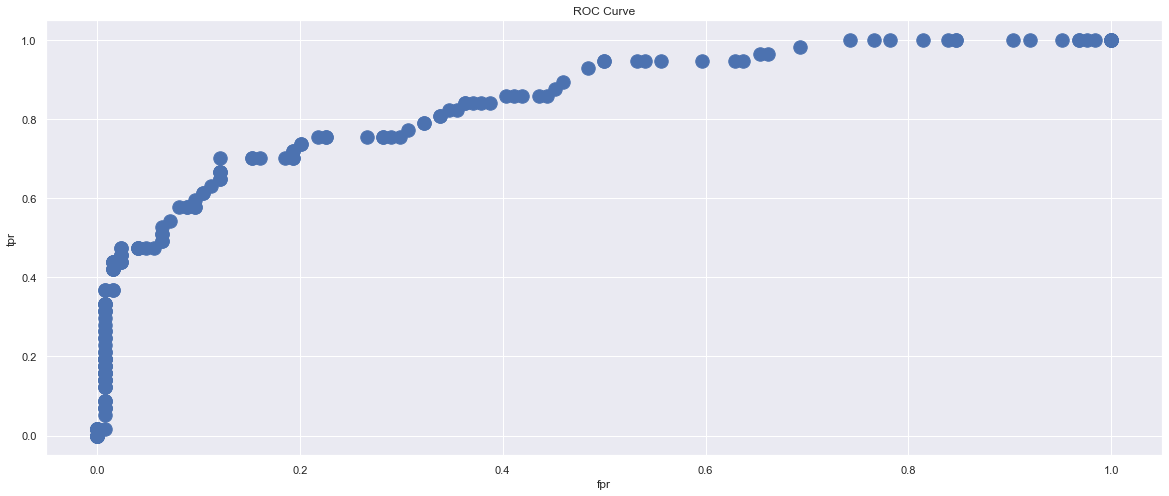

In [14]:
# make these scatters to the chart
sns.set()
plt.figure(figsize=(20,8))
ROC = roc_from_scratch(data1['scored.probability'],data1['class'],partitions=len(data1))
plt.scatter(ROC[:,0],ROC[:,1],s=len(data1))
plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [15]:
#calculate the AUC
partitions = len(data1)
fpr, tpr = ROC[:, 0], ROC[:, 1]
rectangle_roc = 0
for k in range(partitions):
        rectangle_roc = rectangle_roc + (fpr[k]- fpr[k + 1]) * tpr[k]
rectangle_roc

0.8538483305036786

## Pre-built functions in sklearn lib

###  confusion_matrix

In [16]:
# load the confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(data1['class'], data1['scored.class']),
    columns=[
        "Predicted 0",
        "Predict 1",
    ],
    index=["Actual 0", "Actual 1"],
)

,Predicted 0,Predict 1
Actual 0,119,5
Actual 1,30,27


### Accuracy

In [17]:
# Calculate accuracy score by using python pre-built function
from sklearn.metrics import accuracy_score
accuracy_score(data1['class'], data1['scored.class'])

0.8066298342541437

### Recall

In [18]:
# Calculate recall score by using python pre-built function
from sklearn.metrics import recall_score
recall_score(data1['class'], data1['scored.class'])

0.47368421052631576

### Precession

In [19]:
# Calculate precision score by using python pre-built function
from sklearn.metrics import precision_score
precision_score(data1['class'], data1['scored.class'])

0.84375

### F1

In [20]:
# Calculate F1 score by using python pre-built function
from sklearn.metrics import f1_score
f1_score(data1['class'], data1['scored.class'])

0.6067415730337079

According to the result of the functions we wrote and the pre-built functions of python, we can see our result 100% the pre-built function of python.

### Classification_report

In [21]:
# Generate classification report by using python pre-built function
from sklearn.metrics import classification_report
print(classification_report(data1['class'], data1['scored.class']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



### ROC and AUC

In [22]:
# get the value of 'tpr' and 'fpr'
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(data1['class'], data1['scored.probability'])

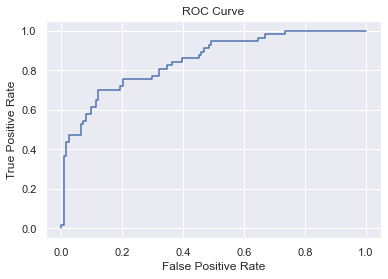

In [23]:
# plot the roc curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve')
plt.show()

In [24]:
# get the value of auc
from sklearn.metrics import roc_auc_score
roc_auc_score(data1['class'], data1['scored.probability'])

0.8503112620260327

In [28]:
# get the value of auc
metrics.auc(fpr, tpr)

0.8503112620260327

According to the result of the functions we wrote and the pre-built functions of python, we can see the roc curves are completely same, and the auc scores are close,too. 